In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## BUSINESS PROBLEM-1

##### BACKGROUND: 
The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available. 

#### BUSINESS PROBLEM:
Using lending club loans data, the team would like to test below hypothesis on how different 
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
##### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
##### b. Loan length is directly effecting intrest rate.
##### c. Inrest rate varies for different purpose of loans
##### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

#### DATA AVAILABLE:
###### LoansData.csv
###### The data have the following variables (with data type and explanation of meaning)
###### Amount.Requested - numeric. The amount (in dollars) requested in the loan application.
###### Amount.Funded.By.Investors - numeric. The amount (in dollars) loaned to the individual.
###### Interest.rate – character. The lending interest rate charged to the borrower.
###### Loan.length - character. The length of time (in months) of the loan.
###### Loan.Purpose – categorical variable. The purpose of the loan as stated by the applicant.
###### Debt.to.Income.Ratio – character. The % of consumer’s gross income going toward paying debts.
###### State - character. The abbreviation for the U.S. state of residence of the loan applicant.
###### Home.ownership - character. Indicates whether the applicant owns, rents, or has a mortgage.
###### Monthly.income - categorical. The monthly income of the applicant (in dollars).
###### FICO.range – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score.
###### Open.CREDIT.Lines - numeric. The number of open lines of credit at the time of application.
###### Revolving.CREDIT.Balance - numeric. The total amount outstanding all lines of credit.
###### Inquiries.in.the.Last.6.Months - numeric. Number of credit inquiries in the previous 6 months.
###### Employment.Length - character. Length of time employed at current job.


Group means:
Amount.Requested
(999.999, 5440.0]     11.654100
(5440.0, 9000.0]      12.165258
(9000.0, 12000.0]     12.526727
(12000.0, 19200.0]    13.520626
(19200.0, 35000.0]    15.482731
Name: Interest.Rate, dtype: float64

Group counts:
Amount.Requested
(999.999, 5440.0]     500
(5440.0, 9000.0]      504
(9000.0, 12000.0]     501
(12000.0, 19200.0]    496
(19200.0, 35000.0]    498
dtype: int64


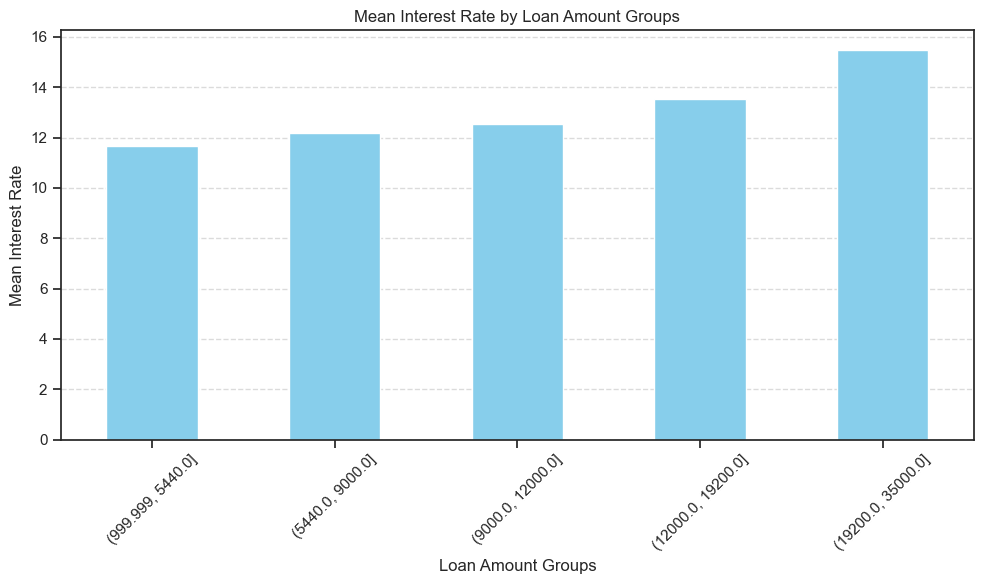


ANOVA results for Hypothesis a:
F-statistic: 72.89369695205069
p-value: 1.7432755497268362e-58
The p-value is less than 0.05, indicating strong evidence against the null hypothesis.
There is a significant difference in the mean interest rates among the groups.


In [15]:
# Step 1: Load the data
data = pd.read_csv(r'C:\Projects\Python_Case_Study4_Hypothesis_Testing\LoansData.csv')

# Step 2: Data preprocessing
data['Interest.Rate'] = data['Interest.Rate'].str.rstrip('%').astype(float)

# Step 3: Descriptive analysis
loan_amount_groups = pd.qcut(data['Amount.Requested'], q=5)
interest_rate_means = data.groupby(loan_amount_groups)['Interest.Rate'].mean()

print("Group means:")
print(interest_rate_means)
print("\nGroup counts:")
print(data.groupby(loan_amount_groups).size())

plt.figure(figsize=(10, 6))
interest_rate_means.plot(kind='bar', color='skyblue')
plt.title('Mean Interest Rate by Loan Amount Groups')
plt.xlabel('Loan Amount Groups')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Hypothesis testing
# Drop rows with missing values in 'Interest.Rate' column
data = data.dropna(subset=['Interest.Rate'])

# Perform ANOVA
f_stat, p_value = f_oneway(*[data.loc[loan_amount_groups == group, 'Interest.Rate'] for group in interest_rate_means.index])

print("\nANOVA results for Hypothesis a:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The p-value is less than 0.05, indicating strong evidence against the null hypothesis.")
    print("There is a significant difference in the mean interest rates among the groups.")
else:
    print("The p-value is greater than or equal to 0.05, indicating weak evidence against the null hypothesis.")
    print("There is no significant difference in the mean interest rates among the groups.")


## BUSINESS PROBLEM - 2

### BACKGROUND: 
When an order is placed by a customer of a small manufacturing company, a price quote must be developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by a pricing expert.The price quote process is labor intensive, as prices depend on many factors such as the part number, customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing process is too complex, and that there might be too much variability in the quoted prices. An improvement team is tasked with studying and improving the pricing process.
After interviewing experts to develop a better understanding of the current process, the team designed a study to determine if there is variability between pricing experts. That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and Barry, were asked to independently provide prices for twelve randomly selected orders. Each expert provided one price for each of the twelve orders.

### BUSINESS PROBLEM: 
We would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry.

### DATA AVAILABLE:
 Price_Quotes.csv
The data set contains the order number, 1 through 12, and the price quotes by Mary 
and Barry for each order. Each row in the data set is the same order. Thus, Mary and 
Barry produced quotes for the same orders.


In [18]:
# Step 1: Load the data
data = pd.read_csv(r'C:\Projects\Python_Case_Study4_Hypothesis_Testing\Price_Quotes.csv')

# Step 2: Descriptive Analysis
print("Summary Statistics:")
print(data.describe())

# Step 3: Hypothesis Testing
mary_quotes = data['Mary_Price']
barry_quotes = data['Barry_Price']

# Perform independent t-test
t_stat, p_value = ttest_ind(mary_quotes, barry_quotes)

# Display the results
print("Independent t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha, ", indicating strong evidence against the null hypothesis.")
    print("There is a significant difference in the average price quotes provided by Mary and Barry.")
else:
    print("The p-value is greater than or equal to", alpha, ", indicating weak evidence against the null hypothesis.")
    print("There is no significant difference in the average price quotes provided by Mary and Barry.")

Summary Statistics:
       Order_Number  Barry_Price  Mary_Price
count     12.000000    12.000000   12.000000
mean       6.500000   124.333333  114.750000
std        3.605551    20.698412   11.054616
min        1.000000    94.000000   97.000000
25%        3.750000   106.750000  107.000000
50%        6.500000   131.000000  114.000000
75%        9.250000   140.500000  121.000000
max       12.000000   152.000000  133.000000
Independent t-test results:
t-statistic: -1.4147436739281787
p-value: 0.17114226132118285
The p-value is greater than or equal to 0.05 , indicating weak evidence against the null hypothesis.
There is no significant difference in the average price quotes provided by Mary and Barry.


## BUSINESS PROBLEM-3:

#### BACKGROUND: 
The New Life Residential Treatment Facility is a NGO that treatsteenagers who have shown signs of mental illness. It provides housing and supervision of teenagers who are making the transition from psychiatric hospitals back into the community. Because many of the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff turnover (attrition) is high.
A reengineering program wasinstituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the

#### Following changes were made:
#####  Employee shifts were shortened from 10 hours to 8 hours each day.
#####  Employees were motivated to become more involved in patient treatments.
##### This included encouraging staff to run varioustherapeutic treatment sessions and allowing staff to have more say in program changes.
#####  The activities budget wasincreased.
#####  A facility-wide performance evaluation system was putinto place that rewarded staff participation andinnovation.
#####  Management and staff instituted a program designed to raise expectations about appropriate behavior from the kids. Thisincluded strict compliance with reporting of behavioral violations, insistence on participation in therapeutic sessions, and a lowered tolerance for even moderate behavioralinfractions. 
To determine the effectiveness of the reengineering effort, a data set comprised of pre- and post-reengineering periods was compiled. The information contains two measures of behavioral problems. A critical incident occurs when a resident goes AWOL (leavesthe premises without permission), destroys property (e.g., punching a hole in a wall or throwing furniture through windows), is caught in possession of street drugs, or engages in assault against other residents or staff members. A teenager istemporarily removed from the facility when s/he is sent to jail or back to a psychiatric hospital

#### BUSINESS PROBLEM: 
Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?

#### DATA AVAILABLE: 
Price_Quotes.csv
The data set contains 20 months of data; the first 13 months were prior to reengineering. The variables in the data include:
#####  Reengineer: Whether the month was before (Prior) or after (Post) reengineering
#####  EmployeeTurnover: The percentage of employees who quit in a given month, out of the total number of employees
#####  TRFF(%): The percentage of residents who were temporarily removed from the facility, out of the total number of residents
#####  CI (%): The percentage of critical incident reports written that month, out of the total number of residents


In [22]:
# Load the dataset
data = pd.read_csv("C:/Projects/Python_Case_Study4_Hypothesis_Testing/Treatment_Facility.csv")

# Display first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Display column names in the DataFrame
print("\nColumn names in the DataFrame:")
print(data.columns)

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Hypothesis Testing
# Separate data for pre-reengineering and post-reengineering periods
pre_reengineer_data = data[data['Reengineer'] == 'Prior']['Employee_Turnover']
post_reengineer_data = data[data['Reengineer'] == 'Post']['Employee_Turnover']

# Perform independent t-test
t_stat, p_value = ttest_ind(pre_reengineer_data, post_reengineer_data)

# Display t-statistic and p-value
print("\nIndependent t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha, ", indicating strong evidence against the null hypothesis.")
    print("There is a significant difference in the employee turnover rates before and after the reengineering effort.")
else:
    print("The p-value is greater than or equal to", alpha, ", indicating weak evidence against the null hypothesis.")
    print("There is no significant difference in the employee turnover rates before and after the reengineering effort.")


First few rows of the DataFrame:
   Month Reengineer  Employee_Turnover       VAR4        VAR5
0      1      Prior             0.0000  24.390244   42.682927
1      2      Prior             6.0606  19.354839   25.806452
2      3      Prior            12.1212  35.087719  146.198830
3      4      Prior             3.3333  18.404908  110.429448
4      5      Prior            12.9032  17.964072   23.952096

Column names in the DataFrame:
Index(['Month', 'Reengineer', 'Employee_Turnover', 'VAR4', 'VAR5'], dtype='object')

Summary Statistics:
          Month  Employee_Turnover       VAR4        VAR5
count  20.00000          20.000000  20.000000   20.000000
mean   10.50000          14.169395  16.582433   43.199541
std     5.91608           8.836302  10.088265   41.715909
min     1.00000           0.000000   4.201681    0.000000
25%     5.75000           9.919350   9.596368   20.731427
50%    10.50000          12.470850  14.998702   25.669183
75%    15.25000          19.230750  19.807134   43.7

## BUSINESS PROBLEM-4
#### BACKGROUND: 
Software development projectstypically follow six basic phases: Requirements, design, implementation (and integration), testing (validation), deployment (installation) and maintenance. First, general requirements are gathered, and the scope of the functionality is defined. Then, alternative scenarios for the required functionality are developed and evaluated. Implementation, usually 50% or more of the development time, is the phase in which the design istranslated into programs and integrated with other parts of the software – this is when software engineers actually develop the code. During the final phases, programs are tested, software is put into use, and faults or performance issues are addressed.
ApDudes, a developer of applicationsfor tablet computers, was having difficulty meeting project deadlines; only 10% of their projects had been completed within budget and on time last year and that wasstarting to hurt business. The group’s project manager wastasked with studying problems within the implementation phase. He found thatsoftware engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the magnitude of the projects.
As a result, two changes were made. Each project was broken down into smaller, distinct tasks, or jobs, and each job was assigned a priority. The project manager believes that this classification and prioritization system would speed the completion of high priority jobs, and thuslower overall project completion time

#### BUSINESS PROBLEM: 
We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

#### DATA AVAILABLE:
 Priority_Assessment.csv
The data set contains a random sample of 642 jobs completed over the lastsix months. The variables in the data set are:
Days The number of days it took to complete the job Priority The priority level assigned to that job


In [24]:
# Load the dataset
data = pd.read_csv("C:/Projects/Python_Case_Study4_Hypothesis_Testing/Priority_Assessment.csv")

# Display first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Display column names in the DataFrame
print("\nColumn names in the DataFrame:")
print(data.columns)

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Separate the data into groups based on priority level
high_priority = data[data['Priority'] == 'High']['Days']
medium_priority = data[data['Priority'] == 'Medium']['Days']
low_priority = data[data['Priority'] == 'Low']['Days']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(high_priority, medium_priority, low_priority)

# Print ANOVA results
print("\nANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating strong evidence against the null hypothesis.")
    print("There is a significant difference in completion times among jobs with different priority levels.")
else:
    print("The p-value is greater than or equal to 0.05, indicating weak evidence against the null hypothesis.")
    print("There is no significant difference in completion times among jobs with different priority levels.")


First few rows of the DataFrame:
   Days Priority
0   3.3     High
1   7.9   Medium
2   0.3     High
3   0.7   Medium
4   8.6   Medium

Column names in the DataFrame:
Index(['Days', 'Priority'], dtype='object')

Summary Statistics:
             Days
count  642.000000
mean     2.946262
std      6.687063
min      0.100000
25%      0.200000
50%      0.600000
75%      2.500000
max     72.900000

ANOVA results:
F-statistic: 1.812311010076072
p-value: 0.16411459461716182
The p-value is greater than or equal to 0.05, indicating weak evidence against the null hypothesis.
There is no significant difference in completion times among jobs with different priority levels.


## BUSINESS PROBLEM-5

#### BackGround: 
Film on the Rocksis a summer movie series held at the world-renowned Red Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison, Colorado fifteen miles west of Denver. The film seriesfeatures classic films, and pre-show entertainment including bands and comedians. Among the features that have made Red Rocks an internationally-famous concertstage are sweeping views of Denver, outstanding acoustics, and cool, dry Colorado summers.
The seriesis jointly promoted by the Denver Film Society (DFS) and the City and County of Denver’s Division of Theatres and Arenas(DT&A). It is marketed through various outlets including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate fundsthat keep ticket priceslow.
Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue, there are tradeoffs. Red Rocks is a farther commute for most people than the local movie theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot, getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.
Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But, the series promoters would also like to increase attendance at the film series, and are unsure how to do this. Promotersrecognize that they need a better understanding of the customer base, and of the current level of satisfaction. Knowing the demographics of those who attend the film series will help attract and expand corporate sponsorship. In addition, knowing which media outlets are most effective will provideinformation about how best to target future marketing campaigns.
To this end, the promoters conducted surveys during a recent Film on the Rocks season. Questionnaires were handed out at the entrance. Volunteers walked through the crowd to remind people about the free soft drink given to those who returned the survey.

#### BUSINESS PROBLEM: 
Use the survey resultsto addressthe following questions
#####  What isthe overall level of customer satisfaction?
#####  What factors are linked to satisfaction?
#####  What is the demographic profile of Film on the Rocks patrons?
#####  In what media outlet(s) should the film series be advertised?

#### DATA AVAILABLE: Data provided by the Denver Film Society
 Films.csv 
The data set contains 330 surveys collected during three Film on the Rocks movies: Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
##### The variables are:
##### Gender The patron’s gender: 1 = male; 2 = female
##### Marital Status The patron’s marital status: 1 = married; 2 = single
##### Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
##### Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50- $100,000; 3 = $100,000+

##### Hear About The patron’s response to this question: 
“How did you hear about Film on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 =
newspaper; 3 = radio; 4 = website; 5 = word of mouth

##### The survey also contained four Likert-scaled questions aboutsatisfaction; each of the following questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.
Signage “How wasthe signage directing you to Red Rocks?”
Parking “How wasthe venue’s parking?”
Clean “How was the cleanliness of the venue?”
Overall “How was your overall customer service experience?

In [30]:
# Load the dataset
data = pd.read_csv("C:/Projects/Python_Case_Study4_Hypothesis_Testing/Films.csv")

# Display first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Column names in the DataFrame
print("\nColumn names in the DataFrame:")
print(data.columns)

# Summary statistics for satisfaction scores
satisfaction_columns = ['Sinage', 'Parking', 'Clean', 'Overall']
satisfaction_mean = data[satisfaction_columns].mean()
print("\nMean satisfaction scores:")
print(satisfaction_mean)


First few rows of the DataFrame:
   _rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1  

Column names in the DataFrame:
Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

Mean satisfaction